 # Homework 2 - eCommerce analytics

This Jupyter notebook contain the answers to the research questions of [ADM Homework2](https://github.com/CriMenghini/ADM/tree/master/2020/Homework_2)

Group 16 is composed by: Haotian Zhang and Francesca Casarano

## Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import gc
import calendar
import json
from collections import OrderedDict

## Load Datasets

We use two methodologies to read and work with files. Because of the huge quantity of data, not always our PCs are able to run the whole dataset. So, depending on what we have to analys, whe choose the faster and easyier way.

The first one consists on loading files as pandas DataFrames and concat them.
The second one consists on process the data set in chunks, one after another, to make computations on this data set more efficient.

In [2]:
oct19= pd.read_csv('2019-Oct.csv',
                      parse_dates=['event_time'],
                      date_parser=pd.to_datetime)
nov19=pd.read_csv('2019-Nov.csv',
                      parse_dates=['event_time'],
                      date_parser=pd.to_datetime)

In [1]:
# Define Files to be Read
files = ['2019-Oct.csv',
         '2019-Nov.csv']

# Define DataFrame Chunk Size

chunksize = 9999999

In [3]:
frame = [oct19,nov19]
df = pd.concat(frame)

## Before Starting
Before starting to solve questions, we should see the kind of data of each column of our dataset.

* Looking at the column **category_code** we notice that it represents not only the category but also the product and, sometimes, also the subcategory.

* There are some Nan values. We decide to consider them as not relevant, and we drop them from de dataset

* There is no *removefromchart* in **event_type** for the two month that we'll consider

**Show the top 5 rows**

In [4]:
print(df.shape) 
df.head(5)

(109950743, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


**Show the bottom 5 rows**

In [5]:
df.tail(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
67501974,2019-11-30 23:59:58+00:00,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58+00:00,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59+00:00,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59+00:00,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0
67501978,2019-11-30 23:59:59+00:00,view,1004233,2053013555631882655,electronics.smartphone,apple,1312.52,579969851,90aca71c-ed8a-4670-866a-761ebacb732d


## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond.

### Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?

For this problem, we should calculate all the rows that its event_type in a user_session equals to three,and this value（write as Th） is the total numbers of complete funnels. The total numbers of distinct user_session is written as Total. So the rate euqals to Th/Total.

In [6]:
CF =pd.DataFrame( df.groupby(['product_id','user_session','event_type']).event_type.count()).rename(columns={'event_type':'count'}).reset_index()
#rename()-> Alter axes labels.
#reset_index()->Reset the index of the DataFrame, and use the default one instead. 
CF = pd.DataFrame(CF.groupby(['product_id','user_session']).user_session.count()).rename(columns={'user_session':'count'}).reset_index()
Total= CF.shape[0]
Th = CF[CF['count']==3].shape[0]
CFR = round(Th*100 / Total,2)
print("The rate of complete funnels is "+str(CFR)+'%.')


The rate of complete funnels is 1.45%.


In [7]:
gc.collect()

20

### What's the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

For this question, we calculate the total number of different operations and the total number of unique user sessions. Then we can calculate and compare the average number of times user perform each operation.

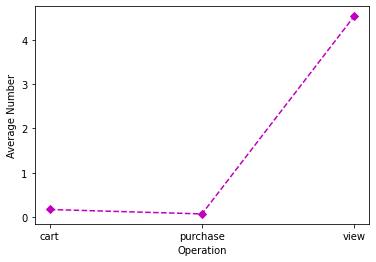

The most common operation:view


In [24]:
'''
Calculate all the times of diffenrent operations AP
'''
AP = df.groupby('event_type').event_type.count()
#print(AP)
# nunique()-> Return number of unique elements in the object.
# unique()-> Return the value of unique elements in the object.
'''
Calculate the average number of times users perform each operation AVAP
'''
AVAP = AP.to_numpy() / df.user_session.nunique()
#print(df.user_session.nunique())
'''
Sort the event_type by the number of  different operations ET
'''
ET = sorted(df.event_type.unique())
plt.xlabel('Operation')
plt.ylabel('Average Number')
plt.plot(ET, AVAP, color='m', linestyle='dashed',  marker='D')
plt.show()

print("The most common operation:"+str(ET[-1]))


In [9]:
gc.collect()

2045

### How many times, on average, a user views a product before adding it to the cart?

In [10]:

VCT= pd.DataFrame(df[(df.event_type == 'view') | (df.event_type == 'cart')].groupby(['product_id','user_session', 'event_type']).event_type.count()).rename(columns={'event_type':'my_count'}).reset_index()
VC = pd.DataFrame(VCT.groupby(['product_id','user_session']).user_session.count()).rename(columns={'user_session':'count'}).reset_index()
VC = VC[VC['count'] == 2]
VC = pd.merge(VCT,VC[['product_id','user_session']], how='inner', on=['product_id','user_session'])
MT= VCT[VCT['event_type'] == 'view'].my_count.mean()
print("The average times that users view a product before purchase is "+str(round(MT,2)))


The average times that users view a product before purchase is 1.5


In [11]:
gc.collect()

20

### What's the probability that products added once to the cart are effectively bought?

Let a={product is added once to the cart},b={product is purchased},then P(products added once to the cart are effectively bought)=P(b|a).
From the multiplication rule, we can know that P(ab)= P(b|a) * P(a), so P(b|a) = P(ab)/P(a).

In [12]:
P_a=df[df['event_type']=='cart'].shape[0]
#Sum = df.user_session.nunique()
CP = pd.DataFrame(df[(df.event_type == 'cart') | (df.event_type == 'purchase')].groupby(['product_id','user_session', 'event_type']).event_type.count()).rename(columns={'event_type':'my_count'}).reset_index()
CP = pd.DataFrame(CP.groupby(['product_id','user_session']).user_session.count()).rename(columns={'user_session':'count'}).reset_index()
CP = CP[CP['count']==2]
P_ab= CP.shape[0]
#P_ab = (Pa * P_b_a) / pow(Sum,2)
P_ba = round(P_ab / P_a,2) 
print("The probability that products added once to the cart are effectively bought is " + str(P_ba))

The probability that products added once to the cart are effectively bought is 0.26


In [13]:
gc.collect()

20

###  What's the average time an item stays in the cart before being removed?

Because we do not find any removerfromcart operation in the file, we think that goods are removed from the cart means that they are purchased successfully.
The average time an item stays in the cart before being removed can be transform to the average time an item stays in the cart before purchased.

In [34]:
#DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
#pd.dropna()Filter out missing data
'''
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
'''
#find all the cart/purchase operation and its event time, then keep the first occured repeat sessions and remove others
cart = df[df['event_type'] == 'cart'].sort_values(by=['event_time']).drop_duplicates(subset = ['user_session'], keep = 'first') 
remove = df[df['event_type'] == 'purchase'].sort_values(by=['event_time']).drop_duplicates(subset = ['user_session'], keep = 'first') 

#calculate the intersection of purchase and cart within a user session and delete the missing value 
#such as no cart operation or no purchase operation within a user session then it would be filtered out
result = pd.merge(cart, remove[['user_session','event_time']], how='inner', on=['user_session']).dropna()

#calculate the mean time between cart view and first purchase
mean_time = (result.event_time_y - result.event_time_x).mean()
cart_remove_time = pd.Timedelta(mean_time).total_seconds() 
print("The average time an item stays in the cart before being removed is " +str(round(cart_remove_time,2))+ ' seconds.')

The average time an item stays in the cart before being removed is 162.05 seconds.


In [15]:
gc.collect()

20

### How much time passes on average between the first view time and a purchase/addition to cart?

In [36]:
#find all the view/cart operation and its event time, then keep the first occured repeat sessions and remove others
view = df[df['event_type'] == 'view'].sort_values(by=['event_time']).drop_duplicates(subset = ['user_session'], keep = 'first') 
cart = df[df['event_type'] == 'cart'].sort_values(by=['event_time']).drop_duplicates(subset = ['user_session'], keep = 'first') 

#calculate the intersection of view and cart within a user session and delete the missing value 
#such as no cart operation or no view operation within a user session then it would be filtered out
result = pd.merge(view, cart[['user_session','event_time']], how='inner', on=['user_session']).dropna()

#calculate the mean time between first view and first cart
mean_time = (result.event_time_y - result.event_time_x).mean()
view_cart_time = pd.Timedelta(mean_time).total_seconds()
print("The average time between the first view and add to cart is " +str(round(view_cart_time,2))+ ' seconds.')

The average time between the first view and add to cart is 350.25 seconds.


In [37]:
#find all the view/purchase operation and its event time, then keep the first occured repeat sessions and remove others
view = df[df['event_type'] == 'view'].sort_values(by=['event_time']).drop_duplicates(subset = ['user_session'], keep = 'first') 
purchase = df[df['event_type'] == 'purchase'].sort_values(by=['event_time']).drop_duplicates(subset = ['user_session'], keep = 'first') 

#calculate the intersection of view and purchase within a user session and delete the missing value 
#such as no purchase operation or no view operation within a user session then it would be filtered out
result = pd.merge(view, purchase[['user_session','event_time']], how='inner', on=['user_session']).dropna()

#calculate the mean time between first view and first purchase 
mean_time = (result.event_time_y - result.event_time_x).mean()
view_purchase_time = pd.Timedelta(mean_time).total_seconds()
print("The average time between the first view and a purchase is " +str(round(view_purchase_time,2))+ ' seconds.')

The average time between the first view and a purchase is 422.75 seconds.


In [18]:
gc.collect()

40

## [RQ2] What are the categories of the most trending products overall? 

The question asks to find the number of sold product per category and plot it by month. 
* So we decide to calculate the number of sold product per category for each month
* then we create two plots for the two months to show it.

### Number of sold product per category -month: October

In [138]:
def sold_october(dataset):
    purchases_O = dataset[dataset['event_type'] == 'purchase']

    purchases_category_O = purchases_O[purchases_O.category_code.notnull()]

    O=purchases_category_O.groupby('category_code').category_code.count()\
    .sort_values(ascending=False)

    for index, row in O.iteritems():
        #Extract category, create dict

        c = str(index).split('.')
        category = c[0]

        if category not in purchase_cat_O.keys():
            purchase_cat_O[category] = int(row)

        else:
            purchase_cat_O[category] += int(row)

            
purchase_cat_O = {}
for chunk in pd.read_csv(files[0], chunksize=chunksize):
    sold_october(chunk)
    

### Number of sold product per category -month: November

In [9]:
def sold_november(dataset):
    purchases_N = dataset[dataset['event_type'] == 'purchase']

    purchases_category_N = purchases_N[purchases_N.category_code.notnull()]

    N = purchases_category_N.groupby('category_code').category_code.count() \
        .sort_values(ascending=False)



    for index, row in N.iteritems():
        # Extract category, create dict

        c = str(index).split('.')
        category = c[0]

        if category not in purchase_cat_N.keys():
            purchase_cat_N[category] = int(row)

        else:
            purchase_cat_N[category] += int(row)


purchase_cat_N = {}
for chunk in pd.read_csv(files[1], chunksize=chunksize):
    sold_november(chunk)
    


### For each month visualize this information through a plot showing the number of sold products per category.

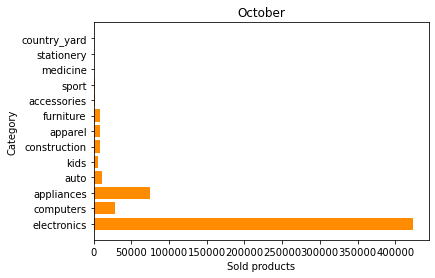

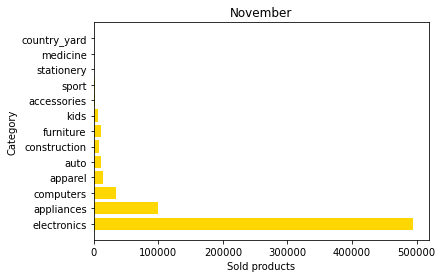

In [17]:
#Plot1: October

plt.title('October')
names = list(purchase_cat_O.keys())
values = list(purchase_cat_O.values())
plt.ylabel('Category')
plt.xlabel('Sold products')
plt.barh(range(len(purchase_cat_O)), values, tick_label=names, color='darkorange')
plt.show()

#Plot2: November

plt.title('November')
names = list(purchase_cat_N.keys())
values = list(purchase_cat_N.values())
plt.ylabel('Category')
plt.xlabel('Sold products')
plt.barh(range(len(purchase_cat_N)), values, tick_label=names, color= 'gold')
plt.show()


We can notice that, in both October and November, *electronics* is the category with the highest nummber of sold product, followed by *appliances* and *computers*. 
In November the number of sold products is a little bit higher.
The number of sold products per category is similar between the two months, so we can assume that there is a kind of "trend" in what are the most favourite categories. 

###  Plot the (5) most visited subcategories 

The request askes to plot the most visited subcategories. We decide to assume that the most visited categories are the top 5 categories with the highest number of visits overall. 

* We started calculating the number of visits per subcategory, storing this info in a dictionary with *key = subcatecory* and *value= number of visits*
 
* Then we sort the dictionary in ascending order by price, and we take only the first 5 subcategories.

* We show them in a plot with different colours per subcategory

We combine category and subcategory to better show the contest

In [14]:
def visited_subcategory(data):
    
    # Filter Data of View Only
    view = data[data['event_type'] == 'view']
    
    #Delete nan values
    view_category = view[view.category_code.notnull()]
    
    view_sub=view_category.groupby('category_code').category_code.count()\
    .sort_values(ascending=False)
    
    
    for index, row in view_sub.iteritems():
        #Extract category+sub, create dict
        c = str(index).split('.')
        category = c[0]
        product = c[1]
        subcategory = category + '.' + product
        
        if subcategory not in view_d.keys():
            view_d[subcategory] = int(row)
    
        else:
            view_d[subcategory] += int(row)

            
view_d={}           
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        visited_subcategory(chunk)

In [15]:
#Five most visited categories+subcategory

d2 = sorted(view_d.items(), key=lambda x: x[1], reverse=True)
#print(d2)
d2[0:5]

[('electronics.smartphone', 25451835),
 ('appliances.kitchen', 8418017),
 ('electronics.audio', 3679555),
 ('apparel.shoes', 3554471),
 ('electronics.clocks', 3267223)]

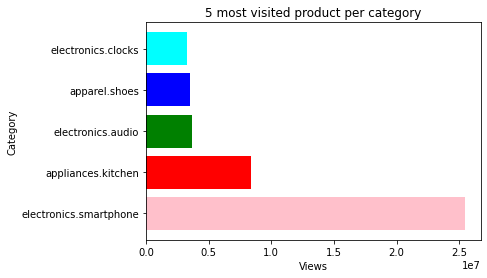

In [66]:
top5 = d2[0:5]

#define x and y
x = []
y=[]

for el in top5:
    x.append(el[0])
    y.append(el[1])

    
#Plot
names = x
values = y

plt.title('5 most visited product per category')
plt.ylabel('Category')
plt.xlabel('Views')
plt.barh(range(len(top5)), values, tick_label=names, color=['pink', 'red', 'green', 'blue', 'cyan'])
plt.show()

We can notice, again, that similarly with the previous plot also here the category *electronics* is the favourite.

The top 5 visited subcategories are:
1. Smartphone
2. kitchen
3. audio
4. shoes
5. clocks

### What are the 10 most sold products per category?

To solve the problem: 
* we create a dictionary of dictionaries in which we store the category as a *key* and its *value* is a dictionary with the product as a *key* and the count of the times they were sold as a *value*
* we sort, for each category, its products in ascending order by price
* we take the first 10 products per catecory


In [5]:
def sold_products_per_category(dataset):
    
    """
    Function that populates the product per category dictionary with, for each category, the most sold procucts in ascending order 
    :param data: Chunk
    :return: Dictionary
    """
    
    purchases = dataset[dataset['event_type'] == 'purchase']

    purchases_category = purchases[purchases.category_code.notnull()]

    P=purchases_category.groupby('category_code').category_code.count()\
    .sort_values(ascending=False)
        
    for index, row in P.iteritems():
        #Extract category, prod create dict

        c = str(index).split('.')
        category = c[0]
        product = c[-1]

        if category in prod_cat:

            if product in prod_cat[category]:

                prod_cat[category][product] += int(row)

            else:

                prod_cat[category][product] = int(row)

        else:

            prod_cat[category] = {product: int(row)}
            
            
prod_cat={}           
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        sold_products_per_category(chunk)

In [35]:
for el in prod_cat:
    
    l = sorted(prod_cat[el].items(), key=lambda x: x[1], reverse=True)
    p=[]
    
    for v in l:
        p.append(v[0])
    #print(p)
    
    print(f' \n{el}:') #print name of category
    print(p[:10])      # and top ten categories

 
electronics:
['smartphone', 'headphone', 'tv', 'clocks', 'tablet', 'telephone', 'subwoofer', 'acoustic', 'piano', 'microphone']
 
computers:
['notebook', 'desktop', 'printer', 'monitor', 'hdd', 'mouse', 'videocards', 'memory', 'keyboard', 'cooler']
 
appliances:
['washer', 'vacuum', 'refrigerators', 'microwave', 'iron', 'blender', 'kettle', 'water_heater', 'oven', 'air_heater']
 
auto:
['player', 'alarm', 'videoregister', 'compressor', 'radar', 'parktronic', 'winch', 'anti_freeze']
 
kids:
['carriage', 'toys', 'diapers', 'skates', 'swing', 'dolls']
 
construction:
['drill', 'saw', 'generator', 'welding', 'faucet', 'pump', 'painting', 'light', 'soldering', 'screw']
 
apparel:
['shoes', 'keds', 'costume', 'jeans', 'underwear', 'shirt', 'tshirt', 'dress', 'moccasins', 'jumper']
 
furniture:
['bed', 'cabinet', 'chair', 'sofa', 'table', 'toilet', 'blanket', 'pillow', 'bath', 'light']
 
accessories:
['bag', 'wallet', 'umbrella']
 
sport:
['bicycle', 'trainer', 'snowboard', 'ski', 'tennis']

* We can notice that not all the categories has ten products, so we see a smaller list.
* Thanks to this list we can see what are the favourite product the users are usual to buy

## [RQ3] For each category, what’s the brand whose prices are higher on average?

### Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

* We first decide to show a list of the category a user can choose in input.

* Then we create the function that take a category in input and return a plot with all the brand of the category. To do it the funtion take into account all the subcategory, in this way we can have all the brand of the category. We splitted the line of the series to take the first part as *category* and then we can store in the dictionary all the brand one subcategory after another 

In [10]:
print('Choose a category in the list below: \n')
for el in prod_cat:
    print(el) #print name of category

Choose a category in the list below: 

electronics
computers
appliances
auto
kids
construction
apparel
furniture
accessories
sport
medicine
stationery
country_yard


#### Function that asks the user a category in input and returns a plot

Choose a category:
country_yard


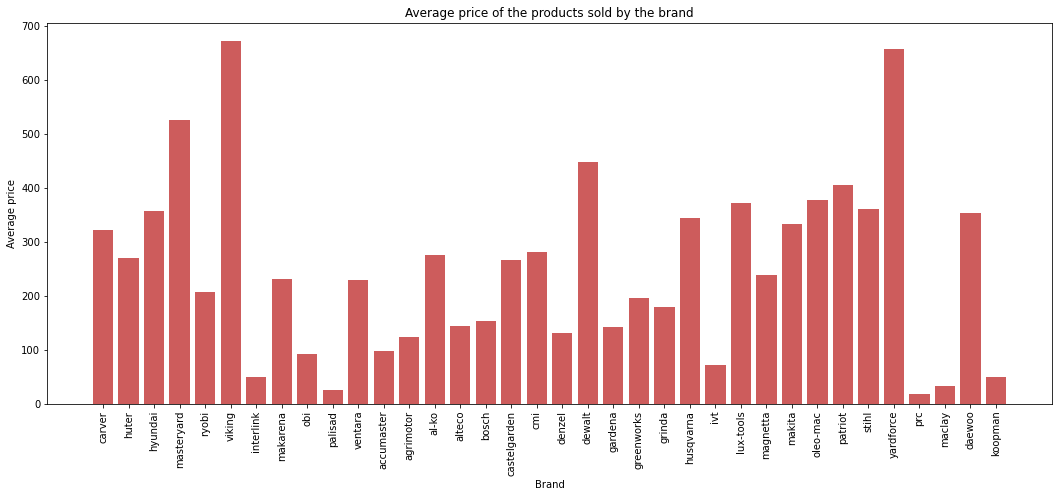

In [6]:
def avg_analysis(data, category):
    
    """
    Function that populates the product per category dictionary with, for each category, the most sold procucts in ascending order 
    :param data: Chunk and category (in input)
    :return: Dictionary
    """
    
    #preparing data, extract columns
    avg = data[['category_code', 'brand', 'price']]
    avg_brand = avg[avg.brand.notnull()]
    
    # new series grouped by category with avg price per brand
    a = avg_brand.groupby([avg_brand.category_code, avg_brand.brand]) \
        .price.mean()

    for index, row in a.iteritems():
        avg_price = row
        brand = index[1]
        cat_prod = str(index[0]).split('.')
        cat = cat_prod[0]
        
        #print(cat)
        #print(brand)
        
        if category == cat:
            if brand not in brand_avg_price.keys():
                brand_avg_price[brand] = avg_price
    
    return brand_avg_price


def plot():
    
    """
    Function that plots the average price of the products sold by the brand of the chosen category
    :param data: Visits Dictionary
    :return: None
    """ 
    # category in input
    print('Choose a category:')
    category = input()
    
    #data
    dict_brand_avg={}
    for file in files:
        for chunk in pd.read_csv(file, chunksize=chunksize):
            dict_brand_avg = avg_analysis(chunk, category)
            

    # Plot
    plt.figure(figsize=(18, 7))
    plt.title('Average price of the products sold by the brand')
    names = list(brand_avg_price.keys())
    values = list(brand_avg_price.values())
    plt.xlabel('Brand')
    plt.ylabel('Average price')
    plt.xticks(rotation=90)
    plt.bar(range(len(brand_avg_price)), values, tick_label=names, color='indianred')
    plt.show()

    
# dict with brand and avg price
brand_avg_price = {}

plot()

The plot speaks clear and show which are de brand with the highest average price

### Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

* first, we take only the columns we're interested in, we sort the values in ascending order by price. So we have first the brand with the highest price.
* we create a dictionary with the category as a key *key* and the brand with his price as a *value* . 
* We take into account account only the first brand per category, that is the brand with the higher price.
* We print for each category the brand and price. They are alredy in ascending oredr.

In [63]:
def sold_products_per_category(data):
    
    """
    Function that populates a dictionary with the brand with the highest average price for each category
    :param data: Chunk
    :return: Dictionary
    """
    
    #take three useful columns
    avg = data[['category_code', 'brand', 'price']]
    
    #delete nan values
    avg_brand = avg[avg.brand.notnull()]

    #sort by price, first  the brands with highest avg price and their category
    a = avg_brand.groupby([avg_brand.category_code, avg_brand.brand])['price'].mean() \
        .sort_values(ascending=False)


    for index, row in a.iteritems():
        # Extract category, brand, avg price create dict with only the first brand per category
        
        # Extract category code, product and create dict
        cat_prod = str(index[0]).split('.')
        category = cat_prod[0]
        brand = (index[1])
        avg_price = round(float(row),2)

        if category not in highest_brand.keys():
            highest_brand[category] = f'{brand} : {avg_price}'


# Fetch Files to Read
highest_brand = {}
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        sold_products_per_category(chunk)


In [136]:
# List of categories

l=['electronics','computers','appliances','auto','kids','construction','apparel','furniture','accessories','sport','medicine','stationery','country_yard']

#new dict
d2={}

#extract only the brand with hight avg prices per category
for j in highest_brand.keys():
    for i in l:
        c = j.split('.')
        if i == c[0] and i not in d2.keys():
            d2[i]=highest_brand[j]

print('List of the brand with the highest average price, in ascending order by price, per category \n')
for k in d2:
    print(f'Category: {k} ', f'---> Brand with the highest average price= {d2[k]}\n')

List of the brand with the highest average price, in ascending order by price, per category 

Category: sport  ---> Brand with the highest average price= pinarello : 2367.89

Category: appliances  ---> Brand with the highest average price= climadiff : 2325.9

Category: electronics  ---> Brand with the highest average price= rado : 2112.48

Category: computers  ---> Brand with the highest average price= apple : 1821.24

Category: kids  ---> Brand with the highest average price= hartan : 1801.82

Category: construction  ---> Brand with the highest average price= senci : 1455.27

Category: furniture  ---> Brand with the highest average price= askona : 1261.86

Category: auto  ---> Brand with the highest average price= schneider : 1048.9

Category: country_yard  ---> Brand with the highest average price= viking : 1026.54

Category: accessories  ---> Brand with the highest average price= weekend : 504.63

Category: apparel  ---> Brand with the highest average price= weekend : 331.72

Catego

We can simply see which brand is the more expensive. For example "apple" for computers or "xerox" for the stationery

## [RQ4] How much does each brand earn per month?


To answer the question we compute the total profit per brand separately per month.


* We take only the purchase product
* We store the total gained in a dictionary with the brand as *key* and his profit as *value*
* The function takes a brand in input and search in the dictionary the total amount gained by it 


### Write a function that given the name of a brand in input returns, for each month, its profit. 


### Brand's profit  -month: October

In [68]:
def october_profit(data):
    purchases_O = data[data['event_type'] == 'purchase']
    
    bO=purchases_O.groupby('brand').price.sum()\
        .sort_values(ascending=False)
    


    #October total gained per brand
    for index, row in bO.iteritems():
        #Extract brand + tot, create dict
        brand = str(index)
        tot = float(row)
        
        if brand not in brand_price_O.keys():
            brand_price_O[brand] = tot
    
        else:
            brand_price_O[brand] += tot
    
# Fetch Files to Read
brand_price_O = {}
for chunk in pd.read_csv(files[0], chunksize=chunksize):
    october_profit(chunk)
    
#print profit in ascending order by price
#print(brand_price_O)    


### Brand's profit  -month: November

In [69]:
def november_profit(data):
    purchases_N = data[data['event_type'] == 'purchase']
    bN=purchases_N.groupby('brand').price.sum().sort_values(ascending=False)
    

    #November total gained per brand

    for index, row in bN.iteritems():
        #Extract brand + tot, create dict
        brand = str(index)
        tot = float(row)
        
        if brand not in brand_price_N.keys():
            brand_price_N[brand] = tot
    
        else:
            brand_price_N[brand] += tot


# Fetch Files to Read   
brand_price_N = {}
for chunk in pd.read_csv(files[1], chunksize=chunksize):
    november_profit(chunk)    


### Function that given the name of a brand in input returns, for each month, its profit

In [132]:
def month_gain_brand(brand):    
    
    
    if brand in brand_price_O:
        gain_oct=brand_price_O[brand]
        print(f'In October {brand} gained: ' + str(round(gain_oct, 2)))    
    else:
        print(f'In October {brand} has not sold products')
              
    
    if brand in brand_price_N:
              
        gain_nov=brand_price_N[brand]
        print(f'In November {brand} gained: ' + str(round(gain_nov, 2)))
              
    else:
        print(f'In November {brand} has not sold products')

        
        
print('Choose a brand:')
brand= input()
month_gain_brand(brand)

Choose a brand:
asus
In October asus gained: 970019.39
In November asus gained: 1665811.59


We can see a better profit in November. We can assume it can depend also on some events that occur in November as "Black Friday" or "Single's day" in which there are many products on sales and people are more inclined to buy.

### Is the average price of products of different brands significantly different?

* We take into account only the column "brand" and "price", that are of our interest. Because we assume that we want to see the average price of the brand in general, that means the average price of the products it has sold. 
* We create a function that that populates a list with the average price of products by brand
* To analys the differences between the average price of products of different brand we generate descriptive statistics by the function *.describe()*

In [87]:
def avg_price_brand(data):
    
    """
    Function that populates a list with the average price of products by brand
    :param data: Chunk
    :return: list
    """    

    # Pandas series with two columns that i'll use
    avg = data[['brand','price']]

    # Eliminate nan values
    avg_brand = avg[avg.brand.notnull()]

    brand_avg_list.append(avg_brand.groupby(['brand'])['price'].mean())


brand_avg_list = []

# Fetch Files to Read
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        avg_price_brand(chunk)

# Join DataFrames
brand_avg = pd.concat(brand_avg_list).sum(level='brand').reset_index()

In [88]:
#Return the first n rows to see if there are the right type of data 
brand_avg.head()

,brand,price
0,a-case,151.743344
1,a-derma,168.000865
2,a-elita,522.505398
3,a-mega,1034.805005
4,aardwolf,567.416394


In [89]:
#Generate descriptive statistics
brand_avg.describe()

,price
count,4302.000000
mean,1663.344933
std,2842.698962
min,2.060000
25%,193.682931
50%,603.165744
75%,1741.518246
max,30020.856000


### Top 3 brands that have suffered the biggest losses in earnings between one month and the next.

In [70]:
losses=[]
losses_d={} 

def loss(brand):
    
    """
    Function that determine the loss between the two months
    :param data: Chunk
    :return: two dict
    """     
    
    if brand in brand_price_O:
        if brand in brand_price_N:
            gain_oct=float(brand_price_O[brand])
            gain_nov=float(brand_price_N[brand])
            loss= ((gain_nov - gain_oct)/ gain_oct)*100
            losses_d[brand] = loss

brand_O = list(brand_price_O.keys())
brand_N =list(brand_price_N.keys())
brand_tot = list(set(brand_O + brand_N))
            
for brand in brand_tot:
    loss(brand)

In [71]:
losses_d_ord = sorted(losses_d.items(), key = lambda x: x[1])
top3_brand = losses_d_ord[0:3]

brand = []
perc = []

for b in top3_brand:
    brand.append(b[0])
    perc.append(round(b[1], 1))
    
    
print(f" {brand[0]} lost {perc[0]}% between October and November \n"
      f" {brand[1]} lost {perc[1]}% between October and November \n"
      f" {brand[2]} lost {perc[2]}% between October and November")


 jonnesway lost -96.6% between October and November 
 sunfull lost -96.0% between October and November 
 evga lost -95.9% between October and November


We can see that the loss of these three brands is really high.

## [RQ5] In what part of the day is your store most visited? 



* We started the analysis taking into account only the viwed prodcut
* We grouped per *event_time* separating the weekday to the hour. We counted the total number of visits in each day and each hour there are in our ecommerce in total.
* To have the averege number of visits we divide the total of the views for the total number of the weekday we has. In October+November there are 8 monday and sunday and 9 of the remaining weekday.
* We create a line plot to show the hourly average of visitors our store has, for each day of the week.

### Create a plot that for each day of the week show the hourly average of visitors your store has.

In [119]:
def visits_analysis(data):
    """
    Function that populates the Visits dictionary with the number of visits per Day/Hour
    :param data: Chunk
    :return: Dictionary
    """

    # Filter Data of view only ---> show the hourly average of visitors your store has
    views = data[data['event_type'] == 'view']

    # query to divide by day and by hour with the count of the visits
    avg_views = views.groupby([views["event_time"].dt.weekday, views["event_time"].dt.hour])['event_type'].count()

    # print(avg_views)
    # Fetch Rows

    for index, row in avg_views.iteritems():
        # count weekday
        w_d = []
    
        dayOfWeek = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    
        # extract day of the week, hour, number of visits
        week_day = dayOfWeek[index[0]]
        hour = index[1]
        num_visits = row
    
    
        # Populate the Visits Dictionary
        if week_day in visits_dict:
    
            if hour in visits_dict[week_day]:
    
                visits_dict[week_day][hour] += num_visits
    
            else:
    
                visits_dict[week_day][hour] = num_visits
    
        else:
    
            visits_dict[week_day] = {hour: num_visits}
            
    

# Init Visits Dictionary
visits_dict = {}

# Fetch Files to Read
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize, header='infer',parse_dates=['event_time'], date_parser=pd.to_datetime):
        visits_analysis(chunk)


# Plot
#visits_plotting(visits_dict)
#df = pd.DataFrame(visits_dict)
#df.plot()

In [122]:
# we have 8 monday and sunday, and 9 Tuesday, Wednesday, Thursday, Thursday
# so the avg visits are the count of the totals for hours between two months divided by the totals days of the week

v = []
for el in visits_dict.keys(): 
    #print('elemento:', el)
    if el in ['Monday', 'Sunday' ]: #, 'Sunday']:
        
        k= visits_dict[el].keys()
        for i in visits_dict[el].values():
            n= float(i/8)
            #avg = round(n,2) 
            v.append(n)
            
        new_dict= dict(zip(k,v))
        visits_dict[el] = new_dict
        #print(visits_dict)
        v.clear()
    
    elif el in ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' ]:

        k= visits_dict[el].keys()
        for i in visits_dict[el].values():
            n= float(i/9)
            #avg = round(n,2) 
            v.append(n)
            
        new_dict= dict(zip(k,v))
        visits_dict[el] = new_dict
        #print(visits_dict)
        v.clear()


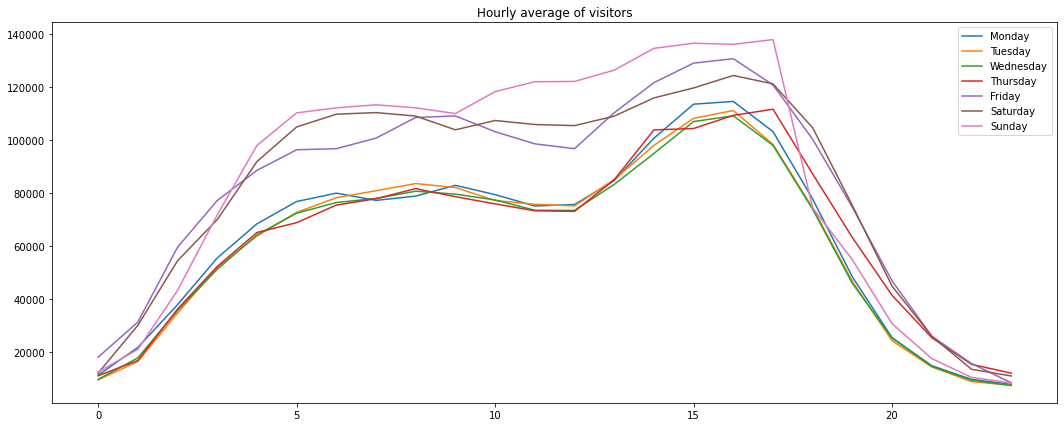

In [130]:
visits_df = pd.DataFrame(visits_dict)
visits_df.plot(figsize = (18, 7),title='Hourly average of visitors')
plt.show()

The plot clearly show that during Friday, Saturday and Sunday the average number of visits is higher.
In general, excluding Saturday and Sunday, in the morning and in the afternoon the store is much more visited. We can notice the curve decreases during lunch, and significatly after 20.
Differently from the other days of the week, during the weekend the curve does not go down during lunch.

Maybe people has much more time in the weekend so there is an higher average number of visits, and also this is costant during the day until dinner time.

## [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?

* To find the overall converion rate we start counting the purchases and views and createing the corresponding dataframe group by category
* we create a plot to show the overall number of purchases of each category (differently from RQ2 in which we have created two different plots for the two months)
* to calculate the conversion rate we apply the formula: purchases_total/views_total

### Find the overall conversion rate of your store.

In [53]:
def sales_analysis(data, purchases, views):

    """
    Funciton that counts the purchases & views and creates the corresponding dataframe group by category
    :param data: DataFrame Chunk
    :param purchases: Temporary number of purchases
    :param views: Temporary number of views
    :return: number of purchases and views
    """

    # Calculate Purchases and Views
    purchases = purchases + len(data[data['event_type'] == 'purchase'])
    views = views + len(data[data['event_type'] == 'view'])

    # Drop NaN values for column "category_code"
    data.dropna(subset=['category_code'], inplace=True)

    # Split the Category from the Sub-Category
    data['category_code'] = data['category_code'].apply(lambda x: str(x).split('.')[0])

    # Create DataFrame of only Purchases and Views
    purchases_df = data[data['event_type'] == 'purchase']
    views_df = data[data['event_type'] == 'view']

    # Append the series calculated by count the purchases and views group by category_code
    category_purchases_list.append(purchases_df.groupby(['category_code'])['event_time'].count())
    category_views_list.append(views_df.groupby(['category_code'])['event_time'].count())

    return purchases, views


def calculate_category_conversion_rate(purchases, views):

    """
    Function that calculates the overall conversion rate per category
    :param purchases: DataFrame purchases per category
    :param views: DataFrame views per category
    :return: category_conversion_rate
    """

    # Concatenate the Two Series into a DataFrame
    category_conversion_rate = views.merge(purchases, on='category_code')

    # Rename Columns
    category_conversion_rate.rename(columns={'count_x': 'views', 'count_y': 'purchases'}, inplace=True)

    # Drop NaNs
    category_conversion_rate = category_conversion_rate.dropna()

    # Calculate Conversion Rate
    category_conversion_rate['conversion_rate'] = category_conversion_rate['purchases']/category_conversion_rate['views']

    # Order by Conversion Rate Descending
    category_conversion_rate = category_conversion_rate.sort_values(by='conversion_rate', ascending=True)

    return category_conversion_rate


def plot_category_purchases_conversion_rate(data):

    """
    Function that plots the purchases and conversion rate of each category
    :param data: DataFrame of Purchases by Category
    :return: Plot
    """

    # Extract X and Y
    x = list(data['category_code'])
    purchases = list(data['purchases'])

    # Plot
    
    plt.title('Purchases per Category')
    y_pos = np.arange(len(x))
    plt.barh(y_pos, purchases, align='center', alpha=1, color='forestgreen')
    plt.yticks(y_pos, x)
    plt.ylabel('Category')
    plt.xlabel('Sold products')
    plt.show()
    
    
# Init Category Analysis DataFrame
category_purchases_list = []
category_views_list = []

# Init Number of Purchases and Views
purchases_total = 0
views_total = 0

# Fetch Files to Read
for file in files:

    for chunk in pd.read_csv(file, chunksize=chunksize):

        purchases_total, views_total = sales_analysis(chunk, purchases_total, views_total)


# Join DataFrames
category_purchases = pd.concat(category_purchases_list).sum(level='category_code').reset_index()
category_views = pd.concat(category_views_list).sum(level='category_code').reset_index()

# Rename Column
category_purchases.rename(columns={'event_time': 'count'}, inplace=True)
category_views.rename(columns={'event_time': 'count'}, inplace=True)

# Calculate the Category Conversion Rate
conversion_rate_df = calculate_category_conversion_rate(category_purchases, category_views)

### Plot the number of purchases of each category

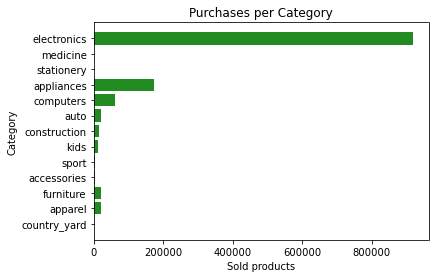

In [54]:
# Plot
plot_category_purchases_conversion_rate(conversion_rate_df)

This plot is similar to the two in RQ2, so it is coerent with what we have previously see. 
The Most sold categories are: 
* electronics
* appliances
* computers

### Show the conversion rate of each category in decreasing order.

In [47]:
# Calculate the Overall Conversion Rate
overall_conversion_rate = purchases_total/views_total

print("The Overall Conversion Rate is: {}".format(str(overall_conversion_rate)))
print("\n Conversion Rate by Category Code:")

#Print conversion rate
conversion_rate_df

The Overall Conversion Rate is: 0.01590817944828352

 Conversion Rate by Category Code:


,category_code,views,purchases,conversion_rate
6,country_yard,31255,132,0.004223
1,apparel,4477518,22217,0.004962
8,furniture,3295250,19843,0.006022
0,accessories,616475,3741,0.006068
11,sport,415087,2725,0.006565
9,kids,1292002,11648,0.009015
5,construction,1759762,16500,0.009376
3,auto,2157706,21339,0.009890
4,computers,6297977,62332,0.009897
2,appliances,12837916,174022,0.013555


We can notice that the overall conversion rate is 1.59%. For a B2B commerce a good conversion rate is around 1-2%. So our conversion rate is a good conversion rate.

Also for some categories we can see a good conversion rate:
* electronics: 2,3%
* Medicine: 1,8%
* stationery 1,6%
* appliances 1,3%
* but also computers, pretty near to 1%

## [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

### Prove that the pareto principle applies to your store.

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

For prvove the Pareto principle, we just have to confirm that the head 20 percent of customers who have purchased goods in our store took up the 80 percent turnovers of our store.

In [31]:

#BC= pd.DataFrame(df[df.event_type == 'purchase'].groupby(['product_id','event_type','user_id']).user_id.count()).rename(columns={'user_id':'my_count'}).reset_index().groupby('my_count').my_count.count()
BCM = pd.DataFrame(df[df.event_type == 'purchase'].groupby(['user_id']).price.sum()).rename(columns={'price':'total_count'}).reset_index()
BCM = pd.DataFrame(BCM).sort_values(by=['total_count'],ascending=0)
customers_twper = math.ceil(0.2 * BCM.shape[0])
business = BCM.head(customers_twper).total_count.sum() / BCM.total_count.sum()
print("The head 20% custommers' purchasing power took up about "+str(round(business*100,2))+'% of the businesses.')

The head 20% custommers' purchasing power took up about 72.1% of the businesses.


From the result, we can see that about 72.1 percent of turnovers came from the head 20% of customers. Actually, the ration(2:7.21) is close to 2:8, so it shown that the Pareto principle states can be applied with the business in our store.